## 0. EDA

> The RT-IoT2022, a proprietary dataset derived from a **real-time IoT infrastructure**, is introduced as a comprehensive resource integrating a diverse range of IoT devices and **sophisticated network attack methodologies**. This dataset encompasses both **normal** and **adversarial** network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a **detailed perspective on the complex nature of network traffic**. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks.


Class Labels

The Dataset contains both Attack patterns and Normal Patterns. 

Attacks patterns Details: 
1.	DOS_SYN_Hping------------------------94659
2.	ARP_poisioning--------------------------7750
3.	NMAP_UDP_SCAN--------------------2590
4.	NMAP_XMAS_TREE_SCAN--------2010
5.	NMAP_OS_DETECTION-------------2000
6.	NMAP_TCP_scan-----------------------1002
7.	DDOS_Slowloris------------------------534
8.	Metasploit_Brute_Force_SSH---------37
9.	NMAP_FIN_SCAN---------------------28

<br>

Normal Patterns Details:

1.	MQTT -----------------------------------8108
2.	Thing_speak-----------------------------4146
3.	Wipro_bulb_Dataset-------------------253 
4. Amazon-Alexa -----------------------86842 (Amazon Alexa is missing in the current dataset)

In [1]:
# # 한글 폰트 출력 관련 (필요시 주석 해제 후 사용)
# import matplotlib
# print(matplotlib.get_data_path())

In [2]:
# 폰트 설정 (https://github.com/Basic-Track-Team5/term-project/issues/2 폰트 설치가 되지 않았다면 먼저 진행)
import matplotlib.pyplot as plt

plt.rc('font', family=['NanumGothic'])

### 0.1. Dataset Overview

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 로드
df = pd.read_csv('RT_IoT2022.csv')
pd.set_option('display.max_columns', 100) # 뒤에 보려고...

df.head(10)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,76.0,8.444444,13.115936,0.0,23.0,32.0,6.4,9.555103,0.0,33.0,108.0,7.714286,11.618477,761.985779,2.972918e+07,3.201160e+07,4.001450e+06,1.040307e+07,4438.877106,1.511694e+06,2.026391e+06,506597.757339,680406.147126,761.985779,2.972918e+07,3.201160e+07,2.462431e+06,8.199747e+06,3.373777,3.0,1.666667,25.333333,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,2.282415e+06,2.282415e+06,2.282415e+06,2.282415e+06,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,76.0,8.444444,13.115936,0.0,23.0,32.0,6.4,9.555103,0.0,33.0,108.0,7.714286,11.618477,247.001648,2.985528e+07,3.188358e+07,3.985448e+06,1.046346e+07,4214.048386,1.576436e+06,1.876261e+06,469065.248966,741351.686212,247.001648,2.985528e+07,3.188358e+07,2.452583e+06,8.242459e+06,3.387323,3.0,1.666667,25.333333,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,2.028307e+06,2.028307e+06,2.028307e+06,2.028307e+06,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,74.0,8.222222,12.852799,0.0,21.0,30.0,6.0,8.689074,0.0,33.0,104.0,7.428571,11.229866,283.956528,2.984215e+07,3.212405e+07,4.015507e+06,1.044238e+07,2456.903458,1.476049e+06,2.013770e+06,503442.466259,660344.360027,283.956528,2.984215e+07,3.212405e+07,2.471081e+06,8.230593e+06,3.237450,3.0,1.666667,24.666667,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.281904e+06,2.281904e+06,2.281904e+06,2.281904e+06,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,74.0,8.222222,12.852799,0.0,21.0,30.0,6.0,8.689074,0.0,33.0,104.0,7.428571,11.229866,288.963318,2.991377e+07,3.196106e+07,3.995133e+06,1.048253e+07,3933.906555,1.551892e+06,1.883784e+06,470946.013927,724569.317911,288.963318,2.991377e+07,3.196106e+07,2.458543e+06,8.257786e+06,3.253959,3.0,1.666667,24.666667,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.047288e+06,2.047288e+06,2.047288e+06,2.047288e+06,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,0.438839,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,76.0,8.444444,13.115936,0.0,23.0,32.0,6.4,9.555103,0.

In [4]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [5]:
# 불필요한 Column 제거
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Removed 'Unnamed: 0' column.")

df.shape

Removed 'Unnamed: 0' column.


(123117, 84)

In [6]:
# 결측치 확인 -> 결측치 없음
df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

In [7]:
# 데이터 통계 정보 확인
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.0,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000,1.231170e+05,123117.000000,1.231170e+05,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,7.035683e+05,0.854571,53.892379,19.779397,20.646637,46.626900,17.695915,18.432678,0.115605,0.950868,0.796454,0.351332,0.393634,2.677737,0.016293,0.0,0.001007,0.000699,96.256073,120.749133,221.519108,100.523827,8.107768,3.817523,52.405005,5.129981e+02,18.786782,20.553025,13.554440,148.510904,7.345172e+02,65.010194,76.041654,8.843266e+03,1.721566e+06,3.780208e+06,2.373575e+05,5.775574e+05,3.764849e+03,4.077267e+05,1.779893e+06,8.765213e+04,1.474803e+05,4.283079e+03,1.725999e+06,3.810575e+06,1.396545e+05,4.501362e+05,4.105345e+07,1.551715,1.337718,136.479504,2.175178e+02,19.249937,1.552337e+02,0.024144,0.131113,3.835746e+03,4.841460e+04,1.331546e+05,1.785898e+05,2.929308e+05,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,7.415634e+05,0.337640,393.027195,5.347869,7.230706,1028.228573,7.997577,9.406320,0.475013,0.474262,0.436998,3.951627,6.007443,41.654868,0.126602,0.0,0.044689,0.031471,45.274996,121.299738,4820.400607,46.097816,45.041897,19.611200,231.305346,4.244143e+04,83.483058,93.397596,35.472227,218.232399,4.296599e+04,50.412145,74.019903,1.226521e+06,9.229085e+06,1.299675e+08,1.895354e+06,3.204813e+06,2.263147e+05,4.288636e+06,9.121196e+07,1.097456e+06,1.784791e+06,2.544910e+05,9.250249e+06,1.300057e+08,8.748026e+05,2.506220e+06,4.485706e+07,2.716957,6.00741

### 0.2. target 변수 확인

In [8]:
# target variable ('Attack_type') 분포 확인
df['Attack_type'].value_counts()

DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: Attack_type, dtype: int64

In [9]:
# 정상 트래픽으로 간주할 원본 label 목록 정의
normal_labels = ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb'] # Amazon Alexa is missing in the current dataset
df['Attack_type'] = df['Attack_type'].apply(lambda x: 'Normal' if x in normal_labels else x)
df['Attack_type'].head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Attack_type, dtype: object

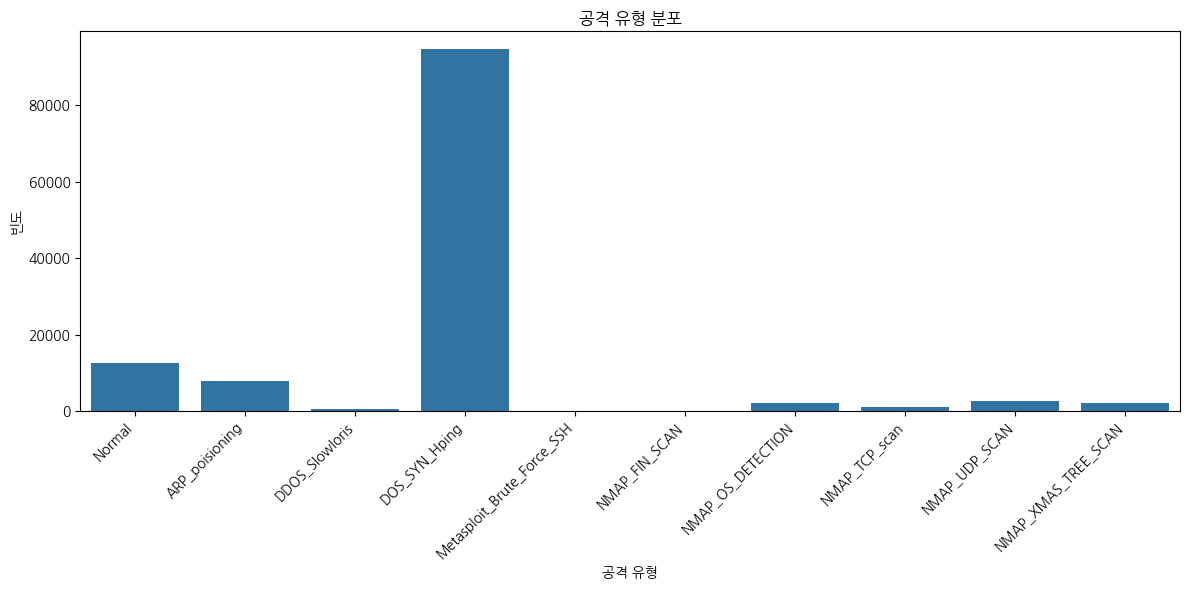

In [10]:
# target variable ('Attack_type') distribution visualization
# TODO: `Normal` 클래스가 적어(약 10%) 나중에 불균형 문제를 해결해야 함!
plt.figure(figsize=(12, 6))
sns.countplot(x='Attack_type', data=df)
plt.title('공격 유형 분포')
plt.xlabel('공격 유형')
plt.ylabel('빈도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 0.3. 숫자형(numerical)/범주형(categorical) Column 분리

In [11]:
# Feature 중 숫자형/범주형 컬럼 분리 (Attack_type 제외)
numeric_features_org = df.select_dtypes(include=np.number).columns.tolist()
categorical_features_org = df.select_dtypes(include='object').columns.tolist()
if 'Attack_type' in categorical_features_org:
    categorical_features_org.remove('Attack_type') # target variable 제외

print(f'Number of numeric features: {len(numeric_features_org)} e.g. {numeric_features_org[:3]}')
print(f'Number of categorical features: {len(categorical_features_org)} e.g. {categorical_features_org[:3]}')
print(f'Total number of features: {len(numeric_features_org) + len(categorical_features_org)}')


Number of numeric features: 81 e.g. ['id.orig_p', 'id.resp_p', 'flow_duration']
Number of categorical features: 2 e.g. ['proto', 'service']
Total number of features: 83


### 0.4. 범주형 자료 확인

In [12]:
for col in categorical_features_org:
    print(f"Column명: {col} \nColumn값 개수: {len(df[col].value_counts())}")
    print(df[col].value_counts())
    print("\n")

Column명: proto 
Column값 개수: 3
tcp     110427
udp      12633
icmp        57
Name: proto, dtype: int64


Column명: service 
Column값 개수: 10
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: service, dtype: int64




In [13]:
# service 의 `-`는 사실상 Null 값과 같음.
# null 값이 대다수 (전체 123117 데이터 중 102861개 = 83.55%)
# 따라서 해당 칼럼도 제거
df.drop(columns=['service'], inplace=True)
categorical_features_org.remove('service')

## 1. Preprocessing

### 1.1. target 변수 Encoding (이진 분류, 다중 분류)

In [14]:
from sklearn.preprocessing import LabelEncoder

# 이진 분류(Binary Classification)용 label 생성
df['Binary_Attack_type'] = df['Attack_type'].apply(lambda x: 'Normal' if x == 'Normal' else 'Attack')

# 이진 분류용 인코딩
binary_label_encoder = LabelEncoder()
df['Binary_Attack_type_Encoded'] = binary_label_encoder.fit_transform(df['Binary_Attack_type'])

# 이진 분류 인코딩 결과의 클래스 확인
print("Classes for Binary Encoding:", binary_label_encoder.classes_)
print(df['Binary_Attack_type_Encoded'].value_counts().sort_index())

Classes for Binary Encoding: ['Attack' 'Normal']
0    110610
1     12507
Name: Binary_Attack_type_Encoded, dtype: int64


In [15]:
# 다중 클래스 분류용 인코딩
multi_class_label_encoder = LabelEncoder()
df['Attack_type_Encoded'] = multi_class_label_encoder.fit_transform(df['Attack_type'])

# 다중 클래스 인코딩 결과의 클래스 확인
print("Classes for Multi-Class Encoding:", multi_class_label_encoder.classes_)
print(df['Attack_type_Encoded'].value_counts().sort_index())

Classes for Multi-Class Encoding: ['ARP_poisioning' 'DDOS_Slowloris' 'DOS_SYN_Hping'
 'Metasploit_Brute_Force_SSH' 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION'
 'NMAP_TCP_scan' 'NMAP_UDP_SCAN' 'NMAP_XMAS_TREE_SCAN' 'Normal']
0     7750
1      534
2    94659
3       37
4       28
5     2000
6     1002
7     2590
8     2010
9    12507
Name: Attack_type_Encoded, dtype: int64


### 1.2. Feauture Data 와 target data 분리

In [16]:
target_columns = ['Attack_type', 'Binary_Attack_type', 'Attack_type_Encoded', 'Binary_Attack_type_Encoded']
feature_columns = [col for col in df.columns if col not in target_columns]

X = df[feature_columns] # X는 target_columns 제외한 나머지
y_binary_encoded = df['Binary_Attack_type_Encoded']
y_multi_encoded = df['Attack_type_Encoded']

print("ColumnTransformer 적용하기 이전 shape:", X.shape)

ColumnTransformer 적용하기 이전 shape: (123117, 82)


### 1.3. 숫자형/범주형 Feature 전처리 Pipeline

In [17]:
# ColumnTransformer 설정:
# - 'num': 숫자형 특징에 StandardScaler 적용
# - 'cat': 범주형 특징에 OneHotEncoder 적용
# OneHotEncoder 적용한 범주형 column은 (service, proto) StandardScaler에서 제외

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_org),
        # 다중공선성 문제 해결을 위해 drop='first' 적용
        # categorical_features_org 중 첫번째 column은 제거됨. 이때 나머지 feature들이 모두 0일때 첫 번째 column인 것임
        # e.g. 
        # service의 세가지 값(tcp, udp, icmp) 중 첫번째 column은 tcp이고 이는 제거됨. 
        # 하나의 row에서 udp, tcp가 둘다 0일때 그 row는 icmp인 것임
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_org)
    ]
)

### 1.4. 전처리 적용

In [18]:
from sklearn.model_selection import train_test_split

# 이진 분류용 훈련/테스트 데이터 분리
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary_encoded, test_size=0.2, random_state=42)

# 다중 분류용 훈련/테스트 데이터 분리
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi_encoded, test_size=0.2, random_state=42)


In [19]:
# 이진 분류용 전처리 적용
X_train_binary_processed = preprocessor.fit_transform(X_train_binary)
X_test_binary_processed = preprocessor.transform(X_test_binary)

# 전처리 적용 후 데이터 shape 확인 
# 처음 85 - 3('Unknown: 0', 'Attack_type', 'service') - 1(proto) + 3(proto의 세 가지 종류) - 1(drop='first' 적용) = 83 clolumns
print("이진 분류용 전처리 적용 후 훈련 데이터 확인: ", X_train_binary_processed.shape)
print("이진 분류용 전처리 적용 후 테스트 데이터 확인: ", X_test_binary_processed.shape)

이진 분류용 전처리 적용 후 훈련 데이터 확인:  (98493, 83)
이진 분류용 전처리 적용 후 테스트 데이터 확인:  (24624, 83)


In [20]:
# 다중 분류용 전처리 적용
X_train_multi_processed = preprocessor.fit_transform(X_train_multi)
X_test_multi_processed = preprocessor.transform(X_test_multi)

# 전처리 적용 후 데이터 shape 확인 
print("다중 분류용 전처리 적용 후 훈련 데이터 확인: ", X_train_multi_processed.shape)
print("다중 분류용 전처리 적용 후 테스트 데이터 확인: ", X_test_multi_processed.shape)

다중 분류용 전처리 적용 후 훈련 데이터 확인:  (98493, 83)
다중 분류용 전처리 적용 후 테스트 데이터 확인:  (24624, 83)


In [21]:
# 오버 샘플링 진행- 학습 데이터가 inbalanced 하므로
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_multi_resampled, y_train_multi_resampled = smote.fit_resample(X_train_multi_processed, y_train_multi)

print("SMOTE 적용 후 X shape:", X_train_multi_resampled.shape)
print("SMOTE 적용 후 y 분포:")
print(pd.Series(y_train_multi_resampled).value_counts().sort_index())

SMOTE 적용 후 X shape: (757620, 83)
SMOTE 적용 후 y 분포:
0    75762
1    75762
2    75762
3    75762
4    75762
5    75762
6    75762
7    75762
8    75762
9    75762
Name: Attack_type_Encoded, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_binary_resampled, y_train_binary_resampled = smote.fit_resample(X_train_binary_processed, y_train_binary)

print("SMOTE 적용 후 X shape:", X_train_binary_resampled.shape)
print("SMOTE 적용 후 y 분포:")
print(pd.Series(y_train_binary_resampled).value_counts().sort_index())



SMOTE 적용 후 X shape: (177080, 83)
SMOTE 적용 후 y 분포:
0    88540
1    88540
Name: Binary_Attack_type_Encoded, dtype: int64


In [23]:
# 이진 분류용 전처리 적용 후 데이터 확인
features_names_binary = preprocessor.get_feature_names_out()
X_processed_binary = pd.DataFrame(X_train_binary_processed, columns=features_names_binary)
X_processed_binary.head()

,num__id.orig_p,num__id.resp_p,num__flow_duration,num__fwd_pkts_tot,num__bwd_pkts_tot,num__fwd_data_pkts_tot,num__bwd_data_pkts_tot,num__fwd_pkts_per_sec,num__bwd_pkts_per_sec,num__flow_pkts_per_sec,num__down_up_ratio,num__fwd_header_size_tot,num__fwd_header_size_min,num__fwd_header_size_max,num__bwd_header_size_tot,num__bwd_header_size_min,num__bwd_header_size_max,num__flow_FIN_flag_count,num__flow_SYN_flag_count,num__flow_RST_flag_count,num__fwd_PSH_flag_count,num__bwd_PSH_flag_count,num__flow_ACK_flag_count,num__fwd_URG_flag_count,num__bwd_URG_flag_count,num__flow_CWR_flag_count,num__flow_ECE_flag_count,num__fwd_pkts_payload.min,num__fwd_pkts_payload.max,num__fwd_pkts_payload.tot,num__fwd_pkts_payload.avg,num__fwd_pkts_payload.std,num__bwd_pkts_payload.min,num__bwd_pkts_payload.max,num__bwd_pkts_payload.tot,num__bwd_pkts_payload.avg,num__bwd_pkts_payload.std,num__flow_pkts_payload.min,num__flow_pkts_payload.max,num__flow_pkts_payload.tot,num__flow_pkts_payload.avg,num__flow_pkts_payload.std,num__fwd_iat.min,num__fwd_iat.max,num__fwd_iat.tot,num__fwd_iat.avg,num__fwd_iat.std,num__bwd_iat.min,num__bwd_iat.max,num__bwd_iat.tot,num__bwd_iat.avg,num__bwd_iat.std,num__flow_iat.min,num__flow_iat.max,num__flow_iat.tot,num__flow_iat.avg,num__flow_iat.std,num__payload_bytes_per_second,num__fwd_subflow_pkts,num__bwd_subflow_pkts,num__fwd_subflow_bytes,num__bwd_subflow_bytes,num__fwd_bulk_bytes,num__bwd_bulk_bytes,num__fwd_bulk_packets,num__bwd_bulk_packets,num__fwd_bulk_rate,num__bwd_bulk_rate,num__active.min,num__active.max,num__active.tot,num__active.avg,num__active.std,num__idle.min,num__idle.max,num__idle.tot,num__idle.avg,num__idle.std,num__fwd_init_window_size,num__bwd_init_window_size,num__fwd_last_window_size,cat__proto_tcp,cat__proto_udp
0,-1.460811,-0.189327,-0.028333,-0.052978,-0.025377,-0.022892,-0.023265,-0.285354,-0.285211,-0.285284,0.430173,-0.080370,0.043596,-0.087214,-0.024031,0.288595,0.167426,-0.243232,0.105451,0.466136,-0.082591,-0.061478,-0.037392,-0.12952,0.0,-0.02293,-0.022502,0.525072,-0.004776,-0.020934,0.424667,-0.179677,-0.193291,-0.226052,-0.010964,-0.225570,-0.219344,-0.382317,-0.129843,-0.013079,-0.098209,0.121374,-0.006746,-0.187666,-0.028171,-0.139649,-0.183810,-0.016119,-0.098717,-0.019397,-0.088242,-0.090747,-0.016711,-0.187684,-0.028340,-0.170172,-0.183772,-0.256986,-0.211362,-0.052427,-0.037626,-0.025741,-0.010555,-0.007448,-0.018276,-0.008414,-0.012801,-0.070148,-0.116763,-0.087043,-0.019538,-0.096155,-0.0316,-0.184193,-0.185007,-0.027699,-0.185764,-0.043433,-0.322095,-0.272335,-0.107900,1.0,0.0
1,-0.745200,-0.189327,-0.028333,-0.052978,-0.025377,-0.022892,-0.023265,-0.411925,-0.411770,-0.411849,0.430173,-0.080370,0.043596,-0.087214,-0.024031,0.288595,0.167426,-0.243232,0.105451,0.466136,-0.082591,-0.061478,-0.037392,-0.12952,0.0,-0.02293,-0.022502,0.525072,-0.004776,-0.020934,0.424667,-0.179677,-0.193291,-0.226052,-0.010964,-0.225570,-0.219344,-0.382317,-0.129843,-0.013079,-0.098209,0.121374,-0.006746,-0.187666,-0.028171,-0.139649,-0.183810,-0.016119,-0.098717,-0.019397,-0.088242,-0.090747,-0.016707,-0.187684,-0.028340,-0.170170,-0.183772,-0.382525,-0.211362,-0.052427,-0.037626,-0.025741,-0.010555,-0.007448,-0.018276,-0.008414,-0.012801,-0.070148,-0.116762,-0.087043,-0.019538,-0.096154,-0.0316,-0.184193,-0.185007,-0.027699,-0.185764,-0.043433,-0.322095,-0.272335,-0.107900,1.0,0.0
2,0.479444,-0.189327,-0.028333,-0.052978,-0.025377,-0.022892,-0.023265,-0.411925,-0.411770,-0.411849,0.430173,-0.080370,0.043596,-0.087214,-0.024031,0.288595,0.167426,-0.243232,0.105451,0.466136,-0.082591,-0.061478,-0.037392,-0.12952,0.0,-0.02293,-0.022502,0.525072,-0.004776,-0.020934,0.424667,-0.179677,-0.193291,-0.226052,-0.010964,-0.225570,-0.219344,-0.382317,-0.129843,-0.013079,-0.098209,0.121374,-0.006746,-0.187666,-0.028171,-0.139649,-0.183810,-0.016119,-0.098717,-0.019397,-0.088242,-0.090747,-0.016707,-0.187684,-0.028340,-0.170170,-0.183772,-0.382525,-0.211362,-0.052427,-0.037626,-0.025741,-0.010555,-0.007448,-0.01

In [24]:
# 다중 분류용 전처리 적용 후 데이터 확인
features_names_multi = preprocessor.get_feature_names_out()
X_processed_multi = pd.DataFrame(X_train_multi_processed, columns=features_names_multi)
X_processed_multi.head()

,num__id.orig_p,num__id.resp_p,num__flow_duration,num__fwd_pkts_tot,num__bwd_pkts_tot,num__fwd_data_pkts_tot,num__bwd_data_pkts_tot,num__fwd_pkts_per_sec,num__bwd_pkts_per_sec,num__flow_pkts_per_sec,num__down_up_ratio,num__fwd_header_size_tot,num__fwd_header_size_min,num__fwd_header_size_max,num__bwd_header_size_tot,num__bwd_header_size_min,num__bwd_header_size_max,num__flow_FIN_flag_count,num__flow_SYN_flag_count,num__flow_RST_flag_count,num__fwd_PSH_flag_count,num__bwd_PSH_flag_count,num__flow_ACK_flag_count,num__fwd_URG_flag_count,num__bwd_URG_flag_count,num__flow_CWR_flag_count,num__flow_ECE_flag_count,num__fwd_pkts_payload.min,num__fwd_pkts_payload.max,num__fwd_pkts_payload.tot,num__fwd_pkts_payload.avg,num__fwd_pkts_payload.std,num__bwd_pkts_payload.min,num__bwd_pkts_payload.max,num__bwd_pkts_payload.tot,num__bwd_pkts_payload.avg,num__bwd_pkts_payload.std,num__flow_pkts_payload.min,num__flow_pkts_payload.max,num__flow_pkts_payload.tot,num__flow_pkts_payload.avg,num__flow_pkts_payload.std,num__fwd_iat.min,num__fwd_iat.max,num__fwd_iat.tot,num__fwd_iat.avg,num__fwd_iat.std,num__bwd_iat.min,num__bwd_iat.max,num__bwd_iat.tot,num__bwd_iat.avg,num__bwd_iat.std,num__flow_iat.min,num__flow_iat.max,num__flow_iat.tot,num__flow_iat.avg,num__flow_iat.std,num__payload_bytes_per_second,num__fwd_subflow_pkts,num__bwd_subflow_pkts,num__fwd_subflow_bytes,num__bwd_subflow_bytes,num__fwd_bulk_bytes,num__bwd_bulk_bytes,num__fwd_bulk_packets,num__bwd_bulk_packets,num__fwd_bulk_rate,num__bwd_bulk_rate,num__active.min,num__active.max,num__active.tot,num__active.avg,num__active.std,num__idle.min,num__idle.max,num__idle.tot,num__idle.avg,num__idle.std,num__fwd_init_window_size,num__bwd_init_window_size,num__fwd_last_window_size,cat__proto_tcp,cat__proto_udp
0,-1.460811,-0.189327,-0.028333,-0.052978,-0.025377,-0.022892,-0.023265,-0.285354,-0.285211,-0.285284,0.430173,-0.080370,0.043596,-0.087214,-0.024031,0.288595,0.167426,-0.243232,0.105451,0.466136,-0.082591,-0.061478,-0.037392,-0.12952,0.0,-0.02293,-0.022502,0.525072,-0.004776,-0.020934,0.424667,-0.179677,-0.193291,-0.226052,-0.010964,-0.225570,-0.219344,-0.382317,-0.129843,-0.013079,-0.098209,0.121374,-0.006746,-0.187666,-0.028171,-0.139649,-0.183810,-0.016119,-0.098717,-0.019397,-0.088242,-0.090747,-0.016711,-0.187684,-0.028340,-0.170172,-0.183772,-0.256986,-0.211362,-0.052427,-0.037626,-0.025741,-0.010555,-0.007448,-0.018276,-0.008414,-0.012801,-0.070148,-0.116763,-0.087043,-0.019538,-0.096155,-0.0316,-0.184193,-0.185007,-0.027699,-0.185764,-0.043433,-0.322095,-0.272335,-0.107900,1.0,0.0
1,-0.745200,-0.189327,-0.028333,-0.052978,-0.025377,-0.022892,-0.023265,-0.411925,-0.411770,-0.411849,0.430173,-0.080370,0.043596,-0.087214,-0.024031,0.288595,0.167426,-0.243232,0.105451,0.466136,-0.082591,-0.061478,-0.037392,-0.12952,0.0,-0.02293,-0.022502,0.525072,-0.004776,-0.020934,0.424667,-0.179677,-0.193291,-0.226052,-0.010964,-0.225570,-0.219344,-0.382317,-0.129843,-0.013079,-0.098209,0.121374,-0.006746,-0.187666,-0.028171,-0.139649,-0.183810,-0.016119,-0.098717,-0.019397,-0.088242,-0.090747,-0.016707,-0.187684,-0.028340,-0.170170,-0.183772,-0.382525,-0.211362,-0.052427,-0.037626,-0.025741,-0.010555,-0.007448,-0.018276,-0.008414,-0.012801,-0.070148,-0.116762,-0.087043,-0.019538,-0.096154,-0.0316,-0.184193,-0.185007,-0.027699,-0.185764,-0.043433,-0.322095,-0.272335,-0.107900,1.0,0.0
2,0.479444,-0.189327,-0.028333,-0.052978,-0.025377,-0.022892,-0.023265,-0.411925,-0.411770,-0.411849,0.430173,-0.080370,0.043596,-0.087214,-0.024031,0.288595,0.167426,-0.243232,0.105451,0.466136,-0.082591,-0.061478,-0.037392,-0.12952,0.0,-0.02293,-0.022502,0.525072,-0.004776,-0.020934,0.424667,-0.179677,-0.193291,-0.226052,-0.010964,-0.225570,-0.219344,-0.382317,-0.129843,-0.013079,-0.098209,0.121374,-0.006746,-0.187666,-0.028171,-0.139649,-0.183810,-0.016119,-0.098717,-0.019397,-0.088242,-0.090747,-0.016707,-0.187684,-0.028340,-0.170170,-0.183772,-0.382525,-0.211362,-0.052427,-0.037626,-0.025741,-0.010555,-0.007448,-0.01

## 2. 이진분류

### 2.1. 랜덤 포레스트 적용

In [25]:
# GridCV로 모델 튜닝: 오버 샘플링 안했을 때
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

params = {
    'n_estimators': [100, 200],
    'max_depth': [8, 16],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 8]
}

rf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_no_smote = GridSearchCV(
    estimator=rf,
    param_grid=params,
    scoring='f1',
    cv=2,
    n_jobs=-1,
    verbose=1
)

start = time.time()
grid_no_smote.fit(X_train_binary_processed, y_train_binary)
print(" Grid Search (no SMOTE) 소요 시간:", time.time() - start)
print(" 최적 하이퍼파라미터 (no SMOTE):", grid_no_smote.best_params_)
print(" 최고 평균 f1 score (no SMOTE):", grid_no_smote.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
 Grid Search (no SMOTE) 소요 시간: 33.977882623672485
 최적 하이퍼파라미터 (no SMOTE): {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 최고 평균 f1 score (no SMOTE): 0.9922519821019514


In [26]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

rf_best_no_smote = RandomForestClassifier(
    **grid_no_smote.best_params_,
    class_weight='balanced', # no SMOTE이므로 클래스 가중치 적용
    random_state=0,
    n_jobs=-1
)

rf_best_no_smote.fit(X_train_binary_processed, y_train_binary)
y_pred_no_smote = rf_best_no_smote.predict(X_test_binary_processed)

acc = accuracy_score(y_test_binary, y_pred_no_smote)
f1 = f1_score(y_test_binary, y_pred_no_smote)

print(f"\n [No SMOTE] Accuracy: {acc:.4f}")
print(f"[No SMOTE] F1-score: {f1:.4f}")
print("\n classification_report:\n", classification_report(y_test_binary, y_pred_no_smote))


 [No SMOTE] Accuracy: 0.9986
[No SMOTE] F1-score: 0.9933

 classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22070
           1       0.99      0.99      0.99      2554

    accuracy                           1.00     24624
   macro avg       1.00      1.00      1.00     24624
weighted avg       1.00      1.00      1.00     24624



In [27]:
# 오버 샘플링 진행했을 때
grid_smote = GridSearchCV(
    estimator=rf,
    param_grid=params,
    scoring='f1',
    cv=2,
    n_jobs=-1,
    verbose=1
)

start = time.time()
grid_smote.fit(X_train_binary_resampled, y_train_binary_resampled)
print(" Grid Search (SMOTE) 소요 시간:", time.time() - start)
print(" 최적 하이퍼파라미터 (SMOTE):", grid_smote.best_params_)
print(" 최고 평균 f1 score (SMOTE):", grid_smote.best_score_)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
 Grid Search (SMOTE) 소요 시간: 129.66757202148438
 최적 하이퍼파라미터 (SMOTE): {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 최고 평균 f1 score (SMOTE): 0.9989220291430332


In [28]:
rf_best_smote = RandomForestClassifier(
    **grid_smote.best_params_,
    # class_weight='balanced', # 오버 샘플링 진행했으므로 중복 방지를 위해 `balanced` 생략
    random_state=0,
    n_jobs=-1
)

rf_best_smote.fit(X_train_binary_resampled, y_train_binary_resampled)
y_pred_smote = rf_best_smote.predict(X_test_binary_processed)

acc = accuracy_score(y_test_binary, y_pred_smote)
f1 = f1_score(y_test_binary, y_pred_smote)

print(f"\n [SMOTE 적용] Accuracy: {acc:.4f}")
print(f"[SMOTE 적용] F1-score: {f1:.4f}")
print("\n classification_report:\n", classification_report(y_test_binary, y_pred_smote))
######################################################
#recall이 여전히 0.19 → 즉 공격의 81%는 아직도 놓치고 있음
######################################################


 [SMOTE 적용] Accuracy: 0.9987
[SMOTE 적용] F1-score: 0.9936

 classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22070
           1       0.99      1.00      0.99      2554

    accuracy                           1.00     24624
   macro avg       1.00      1.00      1.00     24624
weighted avg       1.00      1.00      1.00     24624



### 2.3. 결과 시각화 (이진분류 랜덤 포레스트 SMOTE 적용 x 기준)

총 83개의 Feature 생성

--- 상위 20개 피처 중요도 ---
                 feature  importance
68            active.min    0.109815
52          flow_iat.min    0.109193
53          flow_iat.max    0.082359
70            active.tot    0.063718
55          flow_iat.avg    0.061138
71            active.avg    0.059906
54          flow_iat.tot    0.058982
69            active.max    0.045562
33  bwd_pkts_payload.max    0.043591
42           fwd_iat.min    0.042438
34  bwd_pkts_payload.tot    0.039280
2          flow_duration    0.033156
45           fwd_iat.avg    0.031990
6      bwd_data_pkts_tot    0.031745
61     bwd_subflow_bytes    0.030774
35  bwd_pkts_payload.avg    0.026267
43           fwd_iat.max    0.014594
48           bwd_iat.max    0.009882
36  bwd_pkts_payload.std    0.009200
50           bwd_iat.avg    0.009147


/tmp/ipykernel_16499/165285986.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


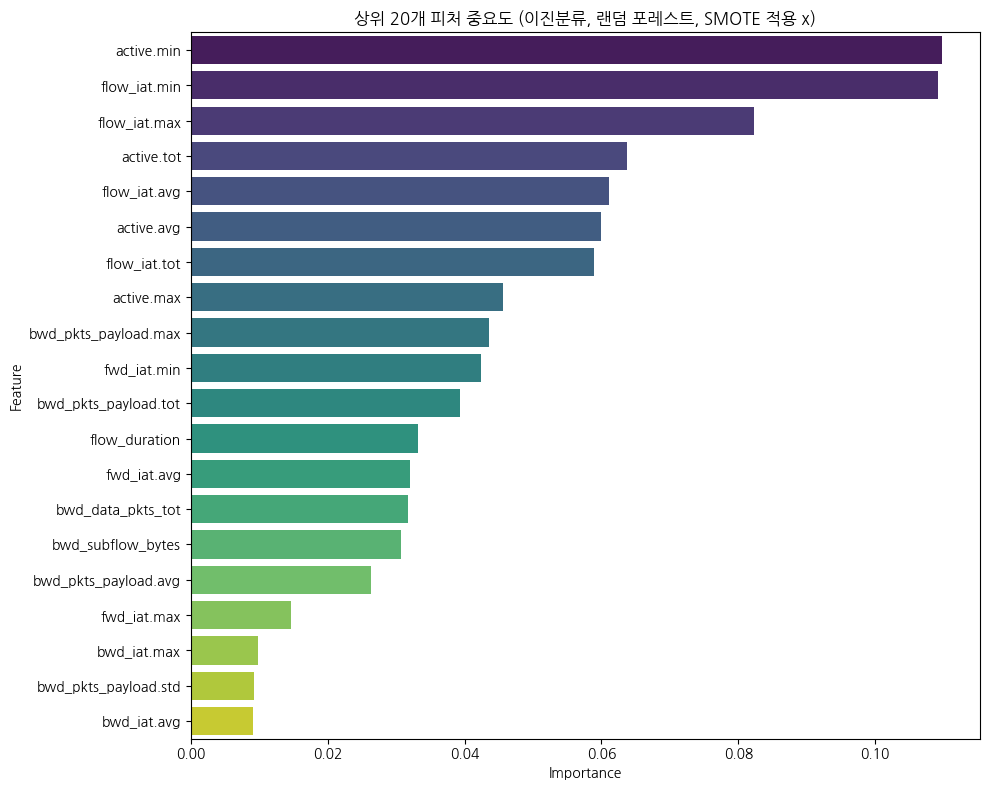

In [29]:
# accuracy가 너무 높게 나와 feature 중요도를 확인해보고자 함
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = list(numeric_features_org) + \
                    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features_org))
print(f"총 {len(feature_names)}개의 Feature 생성")

if 'rf_best_no_smote' in globals() and hasattr(rf_best_no_smote, 'feature_importances_'):
    importances = rf_best_no_smote.feature_importances_

    # 피처 중요도
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # 피처 중요도 출력
    print("\n--- 상위 20개 피처 중요도 ---")
    print(feature_importance_df.head(20))

    # 피처 중요도 시각화 (상위 20개)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('상위 20개 피처 중요도 (이진분류, 랜덤 포레스트, SMOTE 적용 x)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

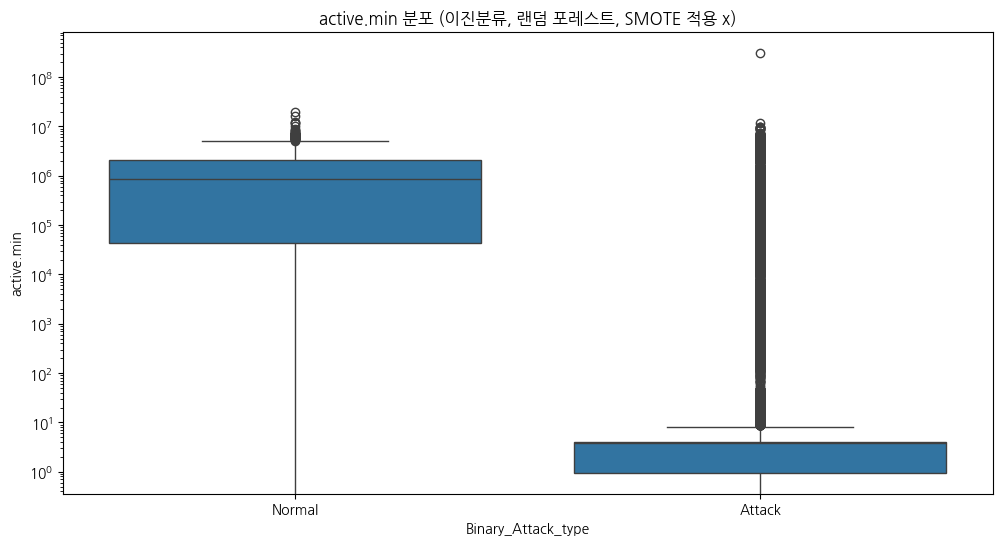

In [30]:
# 1위: active.min 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(x='Binary_Attack_type', y='active.min', data=df)
plt.title('active.min 분포 (이진분류, 랜덤 포레스트, SMOTE 적용 x)')
plt.yscale('log')
plt.show()

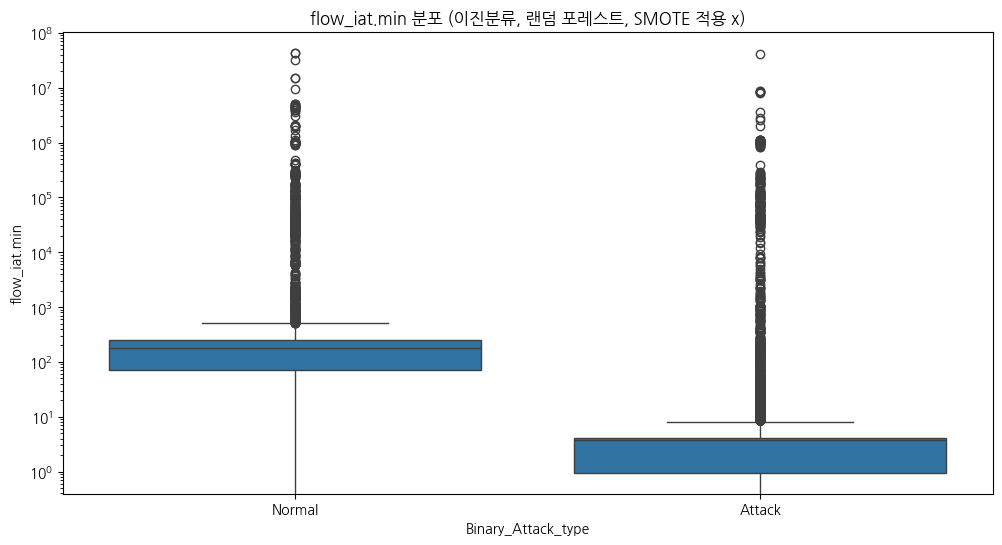

In [31]:
# 2위: iat.min 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(x='Binary_Attack_type', y='flow_iat.min', data=df)
plt.title('flow_iat.min 분포 (이진분류, 랜덤 포레스트, SMOTE 적용 x)')
plt.yscale('log')
plt.show()

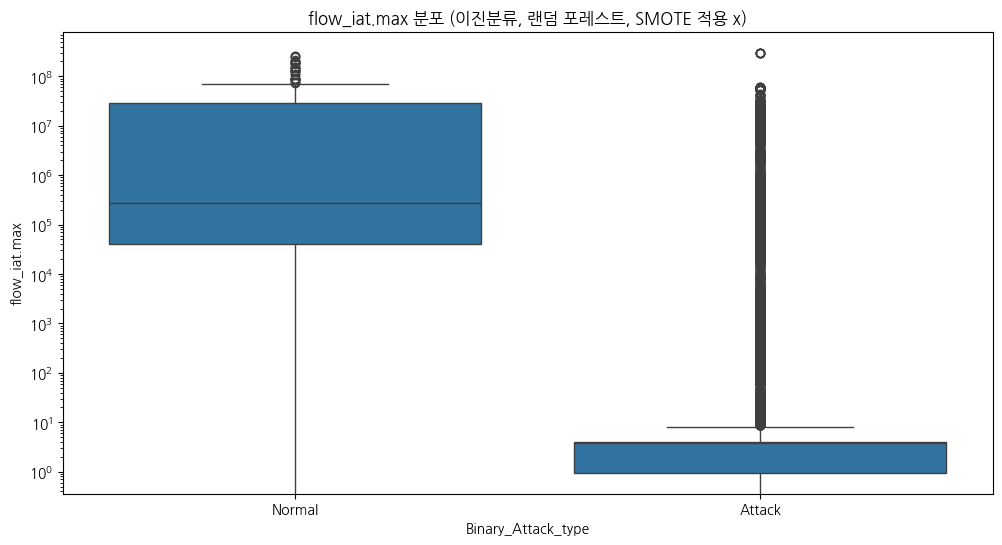

In [32]:
# 3위: iat.max 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(x='Binary_Attack_type', y='flow_iat.max', data=df)
plt.title('flow_iat.max 분포 (이진분류, 랜덤 포레스트, SMOTE 적용 x)')
plt.yscale('log')
plt.show()

### 2.2. LightGBM 적용

In [33]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 기본 이진 분류 모델 정의
lgbm_bin_clf = LGBMClassifier(
    objective='binary',
    n_estimators=500,
    class_weight='balanced',
    random_state=42
)

# 모델 학습
lgbm_bin_clf.fit(X_train_binary_resampled, y_train_binary_resampled)

# 예측 및 평가
y_pred_bin = lgbm_bin_clf.predict(X_test_binary_processed)

print("[이진 분류 평가 결과]")
print(confusion_matrix(y_test_binary, y_pred_bin))
print(classification_report(y_test_binary, y_pred_bin))

[이진 분류 평가 결과]
[[22051    19]
 [    9  2545]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22070
           1       0.99      1.00      0.99      2554

    accuracy                           1.00     24624
   macro avg       1.00      1.00      1.00     24624
weighted avg       1.00      1.00      1.00     24624



In [ ]:
from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import f1_score
from lightgbm import early_stopping, log_evaluation

# 탐색 공간 정의
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_samples': hp.quniform('min_child_samples', 20, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 목적 함수 정의
def objective_func(search_space):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, val_index in kf.split(X_train_binary_resampled):
        X_tr = X_train_binary_resampled[train_index]
        y_tr = y_train_binary_resampled[train_index]
        X_val = X_train_binary_resampled[val_index]
        y_val = y_train_binary_resampled[val_index]

        clf = LGBMClassifier(
            objective='binary',
            n_estimators=100,
            num_leaves=int(search_space['num_leaves']),
            max_depth=int(search_space['max_depth']),
            min_child_samples=int(search_space['min_child_samples']),
            subsample=search_space['subsample'],
            learning_rate=search_space['learning_rate'],
            class_weight='balanced',
            random_state=42
        )

        clf.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='binary_logloss',
            callbacks=[
                early_stopping(30),
                log_evaluation(0)
            ]
        )

        preds = clf.predict(X_val)
        f1 = f1_score(y_val, preds)
        f1_scores.append(f1)

    return -np.mean(f1_scores)  # 최소화

# 튜닝 실행
trials = Trials()
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=10,  # 50 이상으로 늘릴 수도 있음
    trials=trials,
    rstate=np.random.default_rng(seed=42)
)

print("Best hyperparameters found:")
print(best)

Training until validation scores don't improve for 30 rounds
  0%|          | 0/10 [00:05<?, ?trial/s, best loss=?]

In [ ]:
# 최적 파라미터 기반 최종 모델 정의
final_bin_model = LGBMClassifier(
    objective='binary',
    n_estimators=500,
    learning_rate=best['learning_rate'],
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    num_leaves=int(best['num_leaves']),
    subsample=best['subsample'],
    class_weight='balanced',
    random_state=42
)

# 모델 학습
final_bin_model.fit(X_train_binary_resampled, y_train_binary_resampled)

# 예측
y_pred_final_bin = final_bin_model.predict(X_test_binary_processed)

# 평가 출력
print("\n [LightGBM 이진 분류 최종 평가 결과]")
print(confusion_matrix(y_test_binary, y_pred_final_bin))
print(classification_report(y_test_binary, y_pred_final_bin))

## 3. 다중분류

### 3.1. 랜덤 포레스트 적용

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

In [26]:
# 랜덤 포레스트 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 모델 학습 
start = time.time()
rf_clf.fit(X_train_multi_processed, y_train_multi)
print("기본 모델 학습 시간:", time.time() - start)
y_pred = rf_clf.predict(X_test_multi_processed)

acc = accuracy_score(y_test_multi, y_pred)
f1 = f1_score(y_test_multi, y_pred, average='weighted')

print(f"랜덤 포레스트의 Accuracy: {acc:.4f}")
print(f"랜덤 포레스트의 Weighted F1-score: {f1:.4f}")

기본 모델 학습 시간: 6.096452951431274
랜덤 포레스트의 Accuracy: 0.9981
랜덤 포레스트의 Weighted F1-score: 0.9981


In [28]:
# GridSearch 방식으로 하이퍼파리미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [8, 16],
    'min_samples_leaf': [1, 6],
    'min_samples_split': [2, 8]
}

# RandomForestClassifier 사용
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# GridSearchCV 정의
grid_cv = GridSearchCV(
    estimator=rf_clf,
    param_grid=params,
    cv=2,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# 튜닝 실행
start = time.time()
grid_cv.fit(X_train_multi_processed, y_train_multi)
print("Grid Search 소요 시간:", time.time() - start)

# 결과 출력
print('\n최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 평균 f1_weighted 점수: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Grid Search 소요 시간: 29.208497524261475

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최고 평균 f1_weighted 점수: 0.9979


In [31]:
# 클래스 불균형을 고려하여 class_weight 파라미터 추가
# -> SMOTE로 이미 오버 샘플링 진행했으므로 중복 방지를 위해 생략
rf_clf1 = RandomForestClassifier(
    n_estimators=100,
    max_depth=16,
    min_samples_leaf=1,
    min_samples_split=2,
    # class_weight='balanced',
    random_state=0,
    n_jobs=-1
)
rf_clf1.fit(X_train_multi_processed, y_train_multi)

y_pred_best = rf_clf1.predict(X_test_multi_processed)
acc_best = accuracy_score(y_test_multi, y_pred_best)
f1_best = f1_score(y_test_multi, y_pred_best, average='weighted')

print(f"클래스 가중치 적용 모델 Accuracy: {acc_best:.4f}")
print(f"클래스 가중치 적용 모델 Weighted F1-score: {f1_best:.4f}")

클래스 가중치 적용 모델 Accuracy: 0.9984
클래스 가중치 적용 모델 Weighted F1-score: 0.9984


### 3.2. LightGBM 적용

In [29]:
# 아나콘다에 lightgbm 설치하고 진행해주세요!
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# LightGBM 다중 분류용 모델 정의
lgbm_multi_clf = LGBMClassifier(objective='multiclass',
                                n_estimators=500,
                                random_state=42)

# 모델 학습
lgbm_multi_clf.fit(X_train_multi_resampled, y_train_multi_resampled)

# 예측 및 평가
y_pred_multi = lgbm_multi_clf.predict(X_test_multi_processed)

# 평가 결과 출력
print("[다중 분류 평가 결과]")
print(confusion_matrix(y_test_multi, y_pred_multi))
print(classification_report(y_test_multi, y_pred_multi, target_names=multi_class_label_encoder.classes_))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20076
[LightGBM] [Info] Number of data points in the train set: 757620, number of used features: 82
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/home/jpotw/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[다중 분류 평가 결과]
[[ 1570     0     0     0     0     0     0     0     0     8]
 [    0   100     0     0     0     0     0     0     0     0]
 [    0     0 18897     0     0     0     0     0     0     0]
 [    0     0     0     5     0     0     0     1     0     0]
 [    1     0     0     0     2     0     0     0     0     0]
 [    0     0     0     0     0   393     0     0     0     0]
 [    0     0     0     0     0     0   220     0     0     0]
 [    3     0     0     1     0     0     0   482     0     3]
 [    2     0     0     0     0     0     0     1   381     0]
 [   11     1     0     0     0     0     0     0     0  2542]]
                            precision    recall  f1-score   support

            ARP_poisioning       0.99      0.99      0.99      1578
            DDOS_Slowloris       0.99      1.00      1.00       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
Metasploit_Brute_Force_SSH       0.83      0.83      0.83         6
             N

In [33]:
# 아나콘다에 pip install hyperopt 쳐서 설치 후 진행해주세요!
from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# 1. 탐색 공간 정의
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_samples': hp.quniform('min_child_samples', 20, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 2. 목적 함수 정의
def objective_func(search_space):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, val_index in kf.split(X_train_multi_resampled):
        X_tr = X_train_multi_resampled[train_index]
        y_tr = y_train_multi_resampled[train_index]
        X_val = X_train_multi_resampled[val_index]
        y_val = y_train_multi_resampled[val_index]

        clf = LGBMClassifier(
            n_estimators=100,
            objective='multiclass',
            num_class=len(np.unique(y_train_multi_resampled)),
            num_leaves=int(search_space['num_leaves']),
            max_depth=int(search_space['max_depth']),
            min_child_samples=int(search_space['min_child_samples']),
            subsample=search_space['subsample'],
            learning_rate=search_space['learning_rate'],
            random_state=42
        )

        clf.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='multi_logloss',
            callbacks=[
                early_stopping(30),
                log_evaluation(0)
            ]
        )

      
        preds = clf.predict(X_val)
        f1 = f1_score(y_val, preds, average='weighted')
        f1_scores.append(f1)

    return -np.mean(f1_scores)  # 최소화이므로 음수화

# 3. 튜닝 실행
trials = Trials()
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50, # 50으로 설정 시 너무 오래 걸림(10은 약 40분 소요)
    trials=trials,
    rstate=np.random.default_rng(seed=42)
)

print("Best hyperparameters found:")
print(best)


Training until validation scores don't improve for 30 rounds                                           
Early stopping, best iteration is:                                                                     
[64]	valid_0's multi_logloss: 0.00174302
Training until validation scores don't improve for 30 rounds                                           
Early stopping, best iteration is:                                                                     
[55]	valid_0's multi_logloss: 0.00186765
Training until validation scores don't improve for 30 rounds                                           
Early stopping, best iteration is:                                                                     
[65]	valid_0's multi_logloss: 0.0017958
Training until validation scores don't improve for 30 rounds                                           
Did not meet early stopping. Best iteration is:                                                        
[100]	valid_0's multi_logloss: 0.00198999
Trai

In [34]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 최종 모델 정의
final_model = LGBMClassifier(
    objective='multiclass',
    n_estimators=500,
    num_class=len(np.unique(y_train_multi_resampled)),
    learning_rate=best['learning_rate'],
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    num_leaves=int(best['num_leaves']),
    subsample=best['subsample'],
    class_weight='balanced', # 추가
    random_state=42
)

# 모델 학습
final_model.fit(X_train_multi_resampled, y_train_multi_resampled)

# 예측
y_pred_final = final_model.predict(X_test_multi_processed)

# 평가
print(" 최종 모델 평가 결과:")
print(confusion_matrix(y_test_multi, y_pred_final))
print(classification_report(y_test_multi, y_pred_final, target_names=multi_class_label_encoder.classes_))


 최종 모델 평가 결과:
[[  738     4     6   128    28    67    13   157   215   222]
 [    2    46     0     0     1     0     0     6     7    38]
 [    0     0 14813     0     0     0     0     0  4084     0]
 [    1     0     0     4     1     0     0     0     0     0]
 [    0     0     0     0     2     0     0     0     1     0]
 [    0     0     0     0     0    74     0     1   318     0]
 [    0     0     0     0     0     0   205     7     8     0]
 [    4    20     1     4     1     0     0   423    36     0]
 [    0     0     0     1     5     0     0     0   377     1]
 [  124    23     2    50    34    48     7    28   104  2134]]
                            precision    recall  f1-score   support

            ARP_poisioning       0.85      0.47      0.60      1578
            DDOS_Slowloris       0.49      0.46      0.48       100
             DOS_SYN_Hping       1.00      0.78      0.88     18897
Metasploit_Brute_Force_SSH       0.02      0.67      0.04         6
             N

### 3.3. XGBoost 적용

In [ ]:
# # 설치 필요 시 주석을 제거하고 사용해주세요
# !pip install xgboost
# !pip install hyperopt

from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import numpy as np

# 1. 탐색 공간 정의 (XGBoost 하이퍼파라미터)
xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0),
    'gamma': hp.uniform('gamma', 0, 5)
}

# 2. 목적 함수 정의
def objective_func(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, val_index in kf.split(X_train_multi_resampled):
        X_tr = X_train_multi_resampled[train_index]
        y_tr = y_train_multi_resampled[train_index]
        X_val = X_train_multi_resampled[val_index]
        y_val = y_train_multi_resampled[val_index]

        model = XGBClassifier(
            objective='multi:softmax',
            num_class=len(np.unique(y_train_multi_resampled)),
            use_label_encoder=False,
            eval_metric='mlogloss',
            random_state=42,
            **params
        )

        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        f1 = f1_score(y_val, preds, average='weighted')
        f1_scores.append(f1)

    return -np.mean(f1_scores)

# 3. 하이퍼파라미터 튜닝 실행
trials = Trials()
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials,
    rstate=np.random.default_rng(seed=42)
)

print("Best hyperparameters found:")
print(best)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# best 딕셔너리 값 변환
best_params_final = {
    'learning_rate': best['learning_rate'],
    'max_depth': int(best['max_depth']),
    'n_estimators': int(best['n_estimators']),
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'gamma': best['gamma']
}

# 최종 XGBoost 모델 정의
final_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_multi_resampled)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',  # XGBoost는 class_weight 지원 X → 무시됨
    random_state=42,
    **best_params_final
)

# 모델 학습
final_model.fit(X_train_multi_resampled, y_train_multi_resampled)

# 예측
y_pred_final = final_model.predict(X_test_multi_processed)

# 평가
print("최종 XGBoost 모델 평가 결과:")
print(confusion_matrix(y_test_multi, y_pred_final))
print(classification_report(y_test_multi, y_pred_final, target_names=multi_class_label_encoder.classes_))